# Tutorial: Display Gaia EDR3 sources

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle as pkl
import warpfield as w

In [2]:
from astropy.coordinates import SkyCoord, Longitude, Latitude
import astropy.units as u

In [3]:
lon = Longitude(269.267, unit=u.degree)
lat = Latitude(-18.985, unit=u.degree)
pointing = SkyCoord(lon, lat, frame='icrs')

In [4]:
with open('gaia_edr3.pkl','rb') as f:
    gaia_sources = pkl.load(f)

In [5]:
print(gaia_sources)

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    [(269.98167082, -18.57869516, 1224.69071274),
     (269.97802152, -18.57559889,  324.47533736),
     (269.9835042 , -18.56314468, 1386.3884802 ), ...,
     (268.95304902, -19.79798206, 1453.99297353),
     (268.94090109, -19.80146811, 1743.04794159),
     (268.94291844, -19.79621657,  961.61213642)]
 (pm_ra_cosdec, pm_dec) in mas / yr
    [( -3.47320156, -6.59719102), (-21.33238793, 19.44839316),
     (  2.41198999, -0.88761999), ..., ( -0.14121417,  4.28021171),
     ( -0.65096113, -8.71104282), ( -1.00190969,  0.6318477 )]>


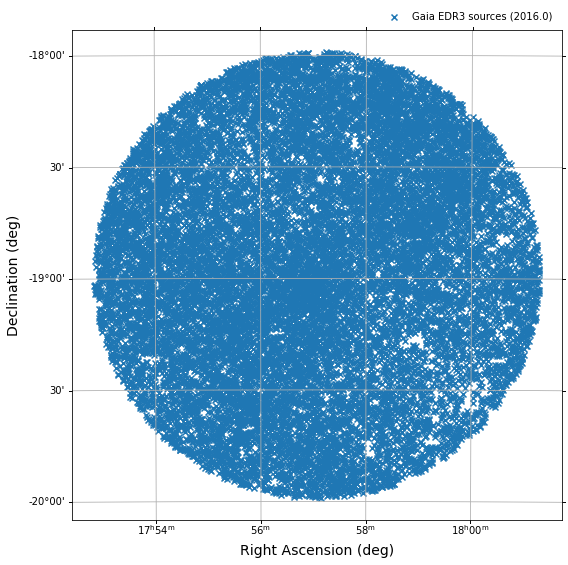

In [6]:
w.display_sources(pointing, gaia_sources, title="Gaia EDR3 sources (2016.0)")

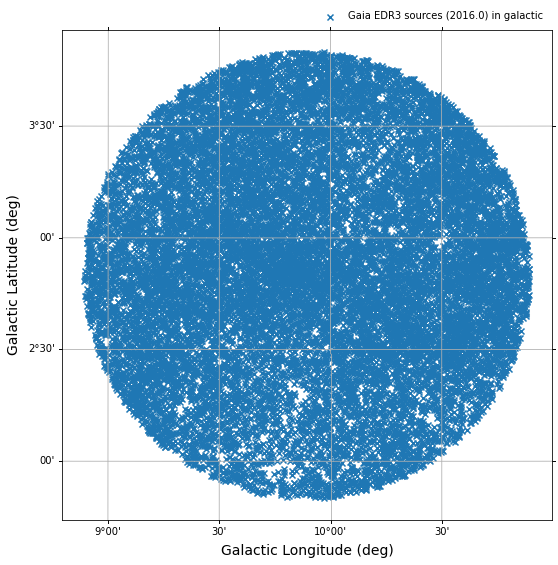

In [7]:
w.display_sources(pointing.galactic, gaia_sources, title="Gaia EDR3 sources (2016.0) in galactic")

In [8]:
w.get_projection(pointing)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 269.267  -18.985  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.0002777777777777778  0.0002777777777777778  
NAXIS : 0  0

In [9]:
w.get_projection(pointing.galactic)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-TAN'  'GLAT-TAN'  
CRVAL : 9.893795685455064  2.8339536021626706  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.0002777777777777778  0.0002777777777777778  
NAXIS : 0  0

In [10]:
pointing.galactic.frame.name

'galactic'

In [11]:
from astropy.time import Time
timestamp = Time.now()
print(timestamp)

2021-06-25 15:43:42.423277


In [12]:
gaia_current = gaia_sources.apply_space_motion(timestamp)
print(gaia_current)

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    [(269.98166524, -18.5787052 , 1224.69071272),
     (269.97798725, -18.57556927,  324.47533734),
     (269.98350807, -18.56314603, 1386.3884802 ), ...,
     (268.95304879, -19.79797554, 1453.99297353),
     (268.94090004, -19.80148138, 1743.04794154),
     (268.94291682, -19.79621561,  961.61213642)]
 (pm_ra, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    [( -3.66415212, -6.59719091, 8.57836673e-06),
     (-22.50478621, 19.44839722, 3.40722641e-05),
     (  2.54436471, -0.88761994, 1.15400373e-06), ...,
     ( -0.1500853 ,  4.28021168, 1.45654151e-03),
     ( -0.69187007, -8.71104282, 1.67602474e-05),
     ( -1.06483828,  0.63184771, 1.70014826e-07)]>


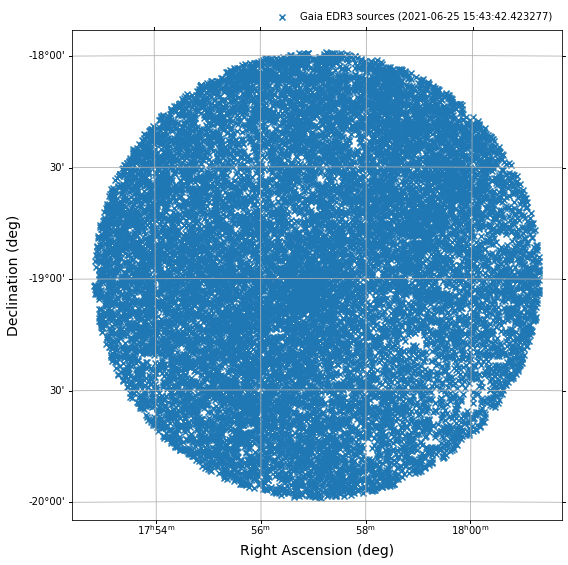

In [13]:
w.display_sources(pointing, gaia_current, title=f"Gaia EDR3 sources ({timestamp})")